<a href="https://colab.research.google.com/github/shaungt1/-open-source-datasets-for-data-science/blob/main/SPritchard_CAP5625_Programming_Assignment_1_10182021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Programmer: Shaun Pritchard**
- **Date: 10-10-2021**
- **Assignment: 1**
- **Prof: Michael DeGiorgio**
<hr>

# **CAP 52625 COMPUTATIONAL FOUDNATIONS OF AI**

## Ridge Regression using Gradient Descent - Assignment 1
<hr>

*Note: I decided to use symbols to make it easier to view to the implementation of code in contrast to the mathmatical thoeroms learned in class.*



## **Deliverables**

>
*   **Deliverable 1:** build graph of dataset N=9 features tuning parameter effect on inferred Ridge regression
*   **Deliverable 2:** Illustrate the effect of the tuning parameter on the cross-validation error
*   **Deliverable 3:** Indicate the value of 𝜆that generated the smallest CV(5)error
*   **Deliverable 4:** retrain  the  modelof 𝑁=400 observations and provide the estimates of the 𝑝=9 *best-fit* model parameters.
*   **Deliverable 4.2:** Alternate less code  way to retrain  the  modelof 𝑁=400 observations and provide the estimates of the 𝑝=9 *best-fit* model parameters*(just for fun).*

## **Import Dataset**

In [ ]:
#Math libs
from math import sqrt
from scipy import stats
# Data Science libs
import numpy as np
import pandas as pd
# Graphics libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Mount Google Drive for data access
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# Set up dataframe instance of dataset Credit_N400_p9.csv
df = pd.read_csv('/content/drive/MyDrive/Florida_Atlantic_University/Computational_Foundations_of_ AI/Credit_N400_p9.csv')
# Set up datafeme for testing
# df = pd.read_csv('/content/Credit_N400_p9.csv')

In [ ]:
# Check feature (row:col) shape of dataframe
df.shape

In [ ]:
# Build copy of dataset for Pre-proccessing
df1 = df.copy()
# Validate new dataframe
df1.head(3)

## **Preproccess Data**

In [ ]:
# Assign dummy variables to catigorical feature attributes
df1 = df1.replace({'Male': 0, 'Female':1, 'No': 0, 'Yes': 1})

In [ ]:
# Validate new trianing dataframe with dummy variables
df1.head(3)

In [ ]:
# Separate independent n X 1 feature X  and convert to numpy array
X = np.array(df1.iloc[:,:-1], dtype='float64')
# Test print X feature data conversion results
print('Matrix shape:{X}\nValidate array:(row:col)'  .format(X = X.shape), '\n', X)

In [ ]:
# Seperate dependant n X 1 feature Y and reshape to (400 x 1) vector numpy array
Y = np.array(df1.iloc[:,-1], dtype='float64').reshape([-1,1])
# Test print Y feature data conversion results
print('Dependant Feature:{Y}\n \nValidate array:(row:col)\n' .format(Y = Y.shape))
for i in Y:
    print(i, end = ' ')

## **Center response variables and standarize features**
- Convert dataframe objects to numpy arrays
- Center the response variable Y (subtracting the mean)
- Standardizing input features X to a Z score
<!-- - Dimension of Y is will be (num_samples,1) and dim of X is assumed to be (num_samples, num_features) -->

In [ ]:
# Center Y response variable(subtract the mean)
Y_p  = Y- np.mean(Y, axis=0)

In [ ]:
# Validate Y response vairables - mean of y_
y_ = np.mean(Y, axis=0)
print('Mean of Y:', y_)
print('Matrix Shape:', Y_p.shape)

In [ ]:
# Split centered (row:col) of Y feature
Y_row, Y_col = Y_p.shape
# validate feature split of Y
print('(Y_p) Row x Col:=',Y_row, Y_col)

In [ ]:
# Standardized X feature n x 1 matrix  as X_p array and reshape
mean_X = np.mean(X, axis=0).reshape([1,-1])
# Center X
X_p = X - mean_X  
# Apply standard deviation to new shape[1,-1]
std_X  = np.std(X_p, axis=0).reshape([1,-1])  
# Caluate centered features divided by standard deviation
X_p = X_p / std_X 

In [ ]:
# Validate X_p feature
print('Matrix Shape:', X_p.shape, '\n', '\n', 'Mean of X:' , '\n', mean_X, '\n', '\n', 'Standard deviation of X:', '\n', std_X)

In [ ]:
#Store and seperate (row:col) in variable for X_p training/test set
X_row , X_col = X.shape 
print('(X_p) Row x Col:=', X_row, X_col)

## **Assign local variables**

In [ ]:
# Local Variables

# Tuning Parms
λ  = np.array([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])

# Learning Rate
α = 1e-5 # learning & convergence rate

# K-folds
k = 5

#Iterations
q = 1000 # itterations

#log base of lambda
λ_log = np.log10(λ) 

#Standerrdized X features
X_p = X_p

#Centered y features
Y_p = Y_p

## **Ridge Regression Batch Gradient Decent**

- Implement(inferred) Batch Gradient Descent for Ridge Regression on standardizing feature X_p and centered feature Y_p numpy arrays. Where p is n x p matrix.
- α = the learning and convergence rate.
- λ = L2 regularization tuning parameters.
- q = max number of iterations (1000) as specified.
- 𝛽x  = Ridge regression beta coefficients parms.
- MSE = is a storage list to contain the mean squared errors for each iteration of the Batch Gradient Descent algorithm.

*Note: I decided to use symbols to make it easier to view to the implementation of code in contrast to the mathmatical thoeroms learned in class.*

## **Ridge Regression Batch Gradient Decent Algorithm**
image.png

In [ ]:
def RidgeRegression_BGD(X, Y, α, λ ) : 
    # Empty list to hold MSE errors
    MSE = []
    # Randomly initialize the parameter vector 𝛽 = [𝛽1, 𝛽2, … , 𝛽𝑝]
    𝛽x = np.random.uniform(-1,1,(X_col,1)) 
    # Instantiate loop to update parameter vectors
    for i in range(q) : 
        # Store 𝛽x coefficients in temp variable
        𝛽x_temp = 𝛽x
        # Update 𝛽x parameter vector as 𝛽x ≔ 𝛽 − 2𝛼[𝜆𝛽 − 𝐗𝑇(𝐲 − 𝐗𝛽)]
        𝛽x = 𝛽x - 2*α*( λ *𝛽x -  np.dot( X.T, Y - np.dot(X,𝛽x) ) )
        # Calcualte vector direction of response variables
        ŷ = np.dot(X,𝛽x)
        # Instantiate temp var "MSE_temp"square-root of real Y variables
        # minus the calculated ŷ response
        MSE_temp = np.mean(np.square(Y - ŷ))
        # Append updated MSE_temp caluation to MSE list
        MSE.append(MSE_temp)
        # Caluate the divided absolute values of 𝛽x coefficients minus 𝛽x
        𝛽t = np.abs((𝛽x - 𝛽x_temp)/𝛽x_temp)
        # Calualte the max value of 𝛽t and store in 𝛽m
        𝛽m = np.max(𝛽t)
# Console log to test my code:
#-------------- Feature Testing Output----------------------------------- 
        if (𝛽m < α):
            print("Testing:\nBatch Gradient Descent(RR_BGD) breaks on: {i} iteration".format(i=i))
            break      
        # Test for convergance error 
    if (MSE[-1] < MSE[0]): #Check MSE is lower than the initial value
        pass 
    else :
        print("Testing:\n Error not converging with lambda = {λ}param".format(λ=λ))
    # Output updated coefficients and MSE
    return 𝛽x, MSE

In [ ]:
# Test tunning paremters inferred on RidgeRegression_BGD()
# Create emtpy list to store updated coefficients
𝛽_lst = []
# Create counter for test ouput
count = 0
# Itterate through RidgeRegression_BGD oupt: 𝛽x, MSE    
for i, l in enumerate(λ):
    # counter
    count += 1 
    # print('Tuning parameters {} \n', lmbdas)
    print('Tuning parameter converged at = #{c}λ {} \n'.format(l, c=count))
    # run RidgeRegression_BGD
    𝛽x, MSE = RidgeRegression_BGD(X_p, Y_p, α, l)
    # Append 𝛽x beta coefficients to empty list
    𝛽_lst.append(𝛽x)


## **Deliverable 1:**
> Build graph of dataset N=9 features tuning parameter effect on inferred Ridge regression

In [ ]:
# Output Deviverable 1: inferred tuning parmeters of ridge regresion
sns.set_theme()
sns.set_style("darkgrid", {"grid.color": ".5","image.cmap": "mako", "grid.linestyle": ":" })
plt.figure()
plt.figure(figsize=(16, 10), dpi=70)
plt.xlabel('λ Tuning Params')
plt.ylabel('p=9 features')
plt.title('Deliverable 1: Inferred Ridge Regression Coefficients')
for i in range(X_col) :
    𝛽j = [ 𝛽x[i,0] for 𝛽x in 𝛽_lst  ]
    legend = 'Beta_λ_{}'.format(i)
    sns.lineplot(x=λ_log,  y=𝛽j , label=legend, )
# Output Deliverable1.jpg to file
plt.savefig('SPritchard_CAP5625_Assignment1_Deliverable1.jpg')
plt.show()



## **(5)K-Fold Grid Search Cross Validation Algorithm**
- (5)K-fold Grid Cross Validation calualted Batch Gradient Decent Ridge Regression with hyperparameter tuning
- Use grid search CV to trian and test 5 k folds
- Calculate test and trainging errors
- Test MSE on tuning params

In [ ]:
# Implement start and end of test k-fold data split
X_row = X.shape[0]
# Divide absolute row features by k = 5
X_row_test = X_row // k
# Store data in k-fold array (Kfold/Kfold_ )
Kfold = [ X_row_test * ind for ind in range(k)] # initial k-folds 
Kfold_ = [ ind + X_row_test for ind in Kfold ]  # End k-folds 

In [ ]:
# Grid Cross Validation for Batch Gradient Decent Ridge Regression with hyperparameter tuning
# Instantiate empty list to hold Cross vlaidations errors
CV = [] 
# Add a counter to iterate tuning params and errors
for i, l in enumerate(λ) :
    # print('(5)K-fold CV tuning parameter error = {}'.format(l))
    MSE = [] 
    # Loop through K trianing and test vectors
    for i in range(k):
        #Hold-out 5 k-folds arrays (80 x 9)
        CV_fold = Kfold[i]
        CV_fold_ = Kfold_[i]
        # Seperate training feature variables
        X_train = np.row_stack(( X[0:CV_fold,:] , X[CV_fold_:, :] ))
        Y_train = np.row_stack(( Y[0:CV_fold,:] , Y[CV_fold_:, :] ))
        # Seperate testing feature variables
        X_test   = X[CV_fold:CV_fold_, :]
        Y_test   = Y[CV_fold:CV_fold_, :]
        # Standardize X test set
        X_test_ = (X_test - np.mean(X_test, axis=0))/np.std(X_test, axis=0) 
        # Center Y test set
        Y_test_ =  Y_test - np.mean(Y_test, axis=0)
        # Implement ridge regressionand MSE on test data
        𝛽x, _ = RidgeRegression_BGD(X_p, Y_p, α, l)
        # Product transofrmation of test data on trining set
        ŷ = np.dot(X_test_, 𝛽x) 
        # Claulate average squareroot of Y(test)- ŷ variables
        err = np.mean(np.square(Y_test_ - ŷ))
        # Append calualtion to MSE list
        MSE.append(err)
    #Caluate average of updated MSE    
    CV_err = np.mean(MSE)
    # Append averaged MSE variables to CV list
    CV.append(CV_err)  

In [ ]:
# console log  to test CV code
#-------------- Feature Testing -----------------------------------
print('Initial (5)K-folds', Kfold, '\n')
print('Ending  (5)K-folds', Kfold_, '\n')
print(X_test.shape, Y_test.shape, X_train.shape, Y_train.shape, '\n')
print(X_test[0,0], Y_test[0,0], X_train[0,0], Y_train[0,0], '\n')  
print("Mean Square Error",err, '\n')
print("MSE value",MSE, '\n')
print("CV_error", CV_err, '\n')


## **Deliverable 2**
- Illustrate the effect of the tuning parameter on the cross validation error by generating a plot.
- Grid Cross Validation tuning errors for each tuning parameter value, perform five-fold cross validation and choose the value of 𝜆 that gives the smallest value.

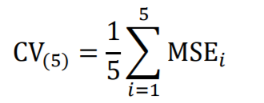

In [ ]:
# Illustrate the effect of the tuning parameter on the cross validation error by  generating a plot
sns.set_theme()
sns.set_style("darkgrid", {"grid.color": ".5","image.cmap": "mako", "grid.linestyle": ":" })
plt.figure()
plt.figure(figsize=(16, 10), dpi=70)
plt.title('Deviverable 2: Effect of tuning parameter on the Cross Validation Error')
plt.xlabel('λ Tuning Params')
plt.ylabel('CV Error')
sns.lineplot(x=λ_log, y=CV , color='purple', markersize=12)
plt.savefig('SPritchard_CAP5625_Assignment1_Deliverable2.jpg')
plt.show()

## **Deliverable 3**

- Indicate the value of 𝜆 that generated the smallest CV(5) error

In [ ]:
#Find minimum MSE error
err = min(MSE)
# index MSE error 
i = MSE.index(err)
# Itereate to find MSe from λ list
l = λ[i]
# Output final results of lowest λ tuning param
print("Best CV error of λ = {e}\nBest tuning param of λ = {l}".format(e=err, l=l))

## **Deliverable 4**
- Given the optimal 𝜆, retrain your model on the entire dataset of 𝑁 = 400
observations and provide the estimates of the 𝑝 = 9 best-fit model parameters.

In [ ]:
# Retrain model based on λ = 10.0
𝛽x, _dh = RidgeRegression_BGD(X_p, Y_p, α, l)
# Output best fit model params of  𝛽x based on on λ = 10.0 tuning param
print('Best fit model parameters', '\n', 𝛽x)